# Flood Prediction Machine Learning Model devloped by Team Karma

In [1]:
# Our Machine Learning Model utilizes 5 Machine Learning Algorithms namely KNN Classification, Logistic Regression, Support 
#Vector, Decision Tree and Random Forest to get the best possible model to predict the floods using Rainfall Data.

In [3]:
#Selecting the Folder/Directory where our Datasets are stored for processing in the ML Model
import os
os.chdir(r'C:\Users\My PC\Desktop\Flood-prediction-master')
os.getcwd()

'C:\\Users\\My PC\\Desktop\\Flood-prediction-master'

# Reading the Data

In [4]:
import numpy as np
import pandas as pd
data=pd.read_csv('kerala.csv')
print(data)

    SUBDIVISION  YEAR   JAN   FEB    MAR    APR    MAY     JUN     JUL  \
0        KERALA  1901  28.7  44.7   51.6  160.0  174.7   824.6   743.0   
1        KERALA  1902   6.7   2.6   57.3   83.9  134.5   390.9  1205.0   
2        KERALA  1903   3.2  18.6    3.1   83.6  249.7   558.6  1022.5   
3        KERALA  1904  23.7   3.0   32.2   71.5  235.7  1098.2   725.5   
4        KERALA  1905   1.2  22.3    9.4  105.9  263.3   850.2   520.5   
5        KERALA  1906  26.7   7.4    9.9   59.4  160.8   414.9   954.2   
6        KERALA  1907  18.8   4.8   55.7  170.8  101.4   770.9   760.4   
7        KERALA  1908   8.0  20.8   38.2  102.9  142.6   592.6   902.2   
8        KERALA  1909  54.1  11.8   61.3   93.8  473.2   704.7   782.3   
9        KERALA  1910   2.7  25.7   23.3  124.5  148.8   680.0   484.1   
10       KERALA  1911   3.0   4.3   18.2   51.0  180.6   990.0   705.3   
11       KERALA  1912   1.9  15.0   11.2  122.7  217.3   948.2   833.6   
12       KERALA  1913   3.1   5.2   20

# Counting number of missing values

In [5]:
data.apply(lambda x:sum(x.isnull()),axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

# Analyzing the Data

In [6]:
print(data.shape)

(118, 16)


In [8]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [9]:
data.cov()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444
JAN,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092
FEB,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330
MAR,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793
APR,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185
MAY,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795
JUN,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986
JUL,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520
AUG,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721
SEP,448.915812,-214.094844,132.629654,527.184758,70.336859,2101.892304,-1194.576633,5846.347194,2178.762799,14859.885839,-369.500828,-280.077350,-49.210243,23610.285602


In [10]:
data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [11]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [12]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [13]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [15]:
#Printing the clean data
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
5,KERALA,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,0
6,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,1
7,KERALA,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,2648.3,0
8,KERALA,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,1
9,KERALA,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,2848.6,0


In [16]:
x=data.iloc[:,1:14]
x

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2
5,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0
6,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8
7,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0
8,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3
9,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1


In [17]:
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      0
8      1
9      0
10     0
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     1
22     1
23     1
24     1
25     1
26     1
27     0
28     1
29     1
      ..
88     0
89     0
90     1
91     1
92     0
93     1
94     0
95     0
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    1
105    1
106    1
107    0
108    0
109    1
110    1
111    0
112    1
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

# Plotting the Data


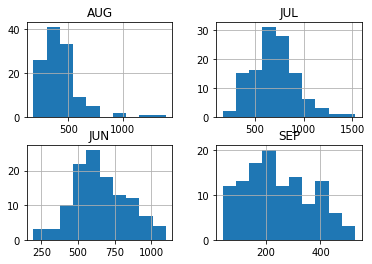

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
c=data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

# Using sklearn to develop the ML Model

In [20]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [21]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
56,1957,1.2,16.0,25.7,70.2,381.2,872.0,835.3,358.8,41.3,280.1,192.5,28.9
35,1936,1.2,16.5,116.0,34.0,466.5,620.8,672.1,367.9,286.7,231.7,211.1,18.6
87,1988,0.8,17.5,38.1,177.6,157.2,511.3,502.8,379.8,451.7,68.5,67.0,31.1
62,1963,30.2,24.8,69.8,96.3,157.1,393.3,720.2,511.0,223.9,282.6,93.4,48.4
104,2005,19.8,7.0,25.3,205.9,134.8,619.2,832.7,291.0,414.7,240.1,184.3,56.4
46,1947,22.2,27.3,98.0,142.2,85.7,556.1,669.3,739.6,394.5,183.7,32.4,47.0
22,1923,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6
27,1928,12.7,65.9,51.3,121.1,81.9,590.7,420.6,553.2,75.9,321.5,155.2,52.7
34,1935,23.9,8.3,18.1,120.7,56.6,431.3,687.3,280.9,283.3,403.8,153.0,30.9
85,1986,5.6,18.7,11.2,63.1,126.7,597.9,324.8,340.3,235.4,165.5,194.7,9.5


In [22]:
x_test

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
10,1911,3.0,4.3,18.2,51.0,180.6,990.0,705.3,178.6,60.2,302.3,145.7,87.6
40,1941,15.9,4.6,12.7,101.9,417.5,797.6,517.9,458.5,257.9,221.6,220.5,84.6
88,1989,10.3,0.0,30.1,141.5,169.4,657.5,450.7,285.5,271.1,308.0,92.9,5.6
42,1943,83.5,14.6,38.4,107.5,478.4,794.5,831.6,183.3,257.6,427.2,223.4,24.3
82,1983,0.2,1.5,0.9,13.1,76.0,322.8,583.2,579.9,421.1,136.2,116.5,69.1
72,1973,0.0,0.3,12.3,131.5,119.9,617.0,583.5,487.5,61.3,260.8,84.5,53.8
55,1956,7.9,11.7,15.1,151.6,351.3,755.4,466.8,319.5,178.4,353.3,178.2,9.1
6,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8
66,1967,14.3,0.1,24.6,70.1,244.9,541.7,741.4,508.4,145.8,172.7,74.0,31.1
28,1929,12.8,29.8,58.9,210.7,148.0,946.6,844.0,293.9,268.9,350.4,158.2,39.4


In [23]:
y_train=y_train.astype('int')
y_train

56     1
35     1
87     0
62     0
104    1
46     1
22     1
27     0
34     0
85     0
69     0
108    0
67     1
78     0
7      0
116    0
64     0
24     1
8      1
61     1
95     0
19     1
41     1
114    0
76     1
2      1
63     0
91     1
71     0
65     0
      ..
33     0
21     1
110    1
107    0
17     0
112    1
20     0
99     0
38     1
111    0
44     0
109    1
86     0
97     1
100    0
80     1
1      1
51     0
54     1
73     0
48     1
98     0
47     1
4      0
79     0
0      1
57     1
83     0
9      0
90     1
Name: FLOODS, Length: 94, dtype: int32

In [24]:
y_test=y_test.astype('int')
y_test

10     0
40     1
88     0
42     1
82     0
72     0
55     0
6      1
66     0
28     1
103    0
50     0
105    1
70     1
26     1
29     1
115    0
18     1
53     1
113    1
93     1
84     0
74     1
58     1
Name: FLOODS, dtype: int32

# KNN classifier to predict

In [25]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
y_predict=clf.predict(x_test)
y_predict

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1])

In [27]:
print("Values for the Floods:")
print(y_test)

Values for the Floods:
10     0
40     1
88     0
42     1
82     0
72     0
55     0
6      1
66     0
28     1
103    0
50     0
105    1
70     1
26     1
29     1
115    0
18     1
53     1
113    1
93     1
84     0
74     1
58     1
Name: FLOODS, dtype: int32


In [28]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1]


In [29]:
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [30]:
knn_acc

array([0.8125    , 0.83870968, 0.61290323])

In [31]:
knn_proba

array([[0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6,

# How accurate is our model?

In [32]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:79.166667
Recall Score:71.428571
ROC score:80.714286
[[ 9  1]
 [ 4 10]]


# Logistic Regression to predict

In [33]:
x_train_std=minmax.fit_transform(x_train)#It is used to fit the values in between 0 and 1
y_train_std=minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
lr_acc

array([0.84375   , 0.87096774, 0.70967742])

In [35]:
lr_proba

array([[0.49327263, 0.50672737],
       [0.37160599, 0.62839401],
       [0.46301453, 0.53698547],
       [0.67288801, 0.32711199],
       [0.40126875, 0.59873125],
       [0.47198224, 0.52801776],
       [0.31686629, 0.68313371],
       [0.76564627, 0.23435373],
       [0.5813667 , 0.4186333 ],
       [0.56820086, 0.43179914],
       [0.6097078 , 0.3902922 ],
       [0.43505703, 0.56494297],
       [0.39493636, 0.60506364],
       [0.51092975, 0.48907025],
       [0.56176752, 0.43823248],
       [0.66511216, 0.33488784],
       [0.61693013, 0.38306987],
       [0.47684854, 0.52315146],
       [0.3994883 , 0.6005117 ],
       [0.65022319, 0.34977681],
       [0.5456655 , 0.4543345 ],
       [0.31513136, 0.68486864],
       [0.57917161, 0.42082839],
       [0.59133286, 0.40866714],
       [0.47967907, 0.52032093],
       [0.34156309, 0.65843691],
       [0.44253279, 0.55746721],
       [0.27685326, 0.72314674],
       [0.63142368, 0.36857632],
       [0.55957336, 0.44042664],
       [0.

In [36]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1])

In [37]:
print(y_test.values)

[0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1]


In [38]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1]


# Accuracy and Efficiency of our Model 

In [39]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:85.714286
roc score:92.857143
[[10  0]
 [ 2 12]]


# Support Vector Classification

In [40]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

In [41]:
svc_acc

array([0.78125   , 0.74193548, 0.58064516])

In [42]:
svc_proba

array([[0.51856294, 0.48143706],
       [0.35254806, 0.64745194],
       [0.47991187, 0.52008813],
       [0.69367346, 0.30632654],
       [0.33081292, 0.66918708],
       [0.45567259, 0.54432741],
       [0.35441813, 0.64558187],
       [0.76849855, 0.23150145],
       [0.59606925, 0.40393075],
       [0.64514364, 0.35485636],
       [0.64565461, 0.35434539],
       [0.43015579, 0.56984421],
       [0.34899147, 0.65100853],
       [0.55957591, 0.44042409],
       [0.6264884 , 0.3735116 ],
       [0.75205953, 0.24794047],
       [0.65656561, 0.34343439],
       [0.46188636, 0.53811364],
       [0.38204671, 0.61795329],
       [0.50919952, 0.49080048],
       [0.54745615, 0.45254385],
       [0.2742707 , 0.7257293 ],
       [0.56483985, 0.43516015],
       [0.5363973 , 0.4636027 ],
       [0.42280062, 0.57719938],
       [0.30563083, 0.69436917],
       [0.43740566, 0.56259434],
       [0.26841244, 0.73158756],
       [0.6288832 , 0.3711168 ],
       [0.52131305, 0.47868695],
       [0.

In [43]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.48143706, 0.64745194, 0.52008813, 0.30632654, 0.66918708,
       0.54432741, 0.64558187, 0.23150145, 0.40393075, 0.35485636,
       0.35434539, 0.56984421, 0.65100853, 0.44042409, 0.3735116 ,
       0.24794047, 0.34343439, 0.53811364, 0.61795329, 0.49080048,
       0.45254385, 0.7257293 , 0.43516015, 0.4636027 , 0.57719938,
       0.69436917, 0.56259434, 0.73158756, 0.3711168 , 0.47868695,
       0.63036872, 0.63483397, 0.59452294, 0.58838141, 0.52051153,
       0.482045  , 0.52080702, 0.59086909, 0.53046573, 0.43927863,
       0.53105631, 0.51535457, 0.53097022, 0.44611982, 0.6075261 ,
       0.64758245, 0.55376469, 0.51989606, 0.67996809, 0.50618692,
       0.54591671, 0.57527535, 0.57725043, 0.61912582, 0.64444039,
       0.50653667, 0.40689919, 0.52555051, 0.5       , 0.62988422,
       0.57056355, 0.49191467, 0.46981721, 0.48676263, 0.48916182,
       0.45088971, 0.5       , 0.53787762, 0.47086482, 0.48908232,
       0.49067477, 0.5384691 , 0.48409507, 0.55311008, 0.51218

In [44]:
y_pred=svc_classifier.predict(x_test)
print("Flood Values:")
print(y_test.values)

Flood Values:
[0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1]


In [45]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Accuracy of our model

In [46]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:41.666667
recall score:0.000000
roc score:50.000000
[[10  0]
 [14  0]]


# Decision Tree Classification

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.4375    , 0.83870968, 0.80645161])

In [48]:
y_pred=dtc_clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1])

In [49]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1]


# Printing the Accuracy

In [50]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:58.333333
recall score:71.428571
roc score:55.714286
[[ 4  6]
 [ 4 10]]


# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [53]:
rmf_clf_acc

array([0.8125    , 0.77419355, 0.74193548])

In [54]:
rmf_proba

array([[0.36166211, 0.63833789],
       [0.66225352, 0.33774648],
       [0.51892975, 0.48107025],
       [0.6755474 , 0.3244526 ],
       [0.40999693, 0.59000307],
       [0.59392975, 0.40607025],
       [0.38440527, 0.61559473],
       [0.77770257, 0.22229743],
       [0.85011458, 0.14988542],
       [0.77415304, 0.22584696],
       [0.68158586, 0.31841414],
       [0.51531728, 0.48468272],
       [0.40063245, 0.59936755],
       [0.59571546, 0.40428454],
       [0.76220057, 0.23779943],
       [0.79720257, 0.20279743],
       [0.58579105, 0.41420895],
       [0.51534152, 0.48465848],
       [0.59544716, 0.40455284],
       [0.42163245, 0.57836755],
       [0.70011458, 0.29988542],
       [0.23561765, 0.76438235],
       [0.46290029, 0.53709971],
       [0.74202634, 0.25797366],
       [0.54032671, 0.45967329],
       [0.18413245, 0.81586755],
       [0.59392975, 0.40607025],
       [0.43249478, 0.56750522],
       [0.73211458, 0.26788542],
       [0.80673223, 0.19326777],
       [0.

In [55]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:58.333333
recall score:71.428571
roc score:55.714286
[[ 4  6]
 [ 4 10]]


# Final Accuracy of our Models 

In [56]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.791667
1   LR  0.916667
2  SVC  0.416667
3   DT  0.583333
4   RF  0.750000


c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


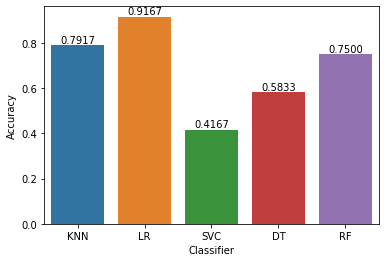

In [57]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# End of the Code. Cheers!